In [1]:

#------------------------------------------------------------------------------
#------------------------------------------------------------------------------

import sys
import os.path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import display

from matplotlib.colors import LogNorm



In [2]:

#------------------------------------------------------------------------------
#------------------------------------------------------------------------------

file_all = "../pax_waveform_simulator/merged/merged_all_v180220.pkl"


#------------------------------------------------------------------------------
#------------------------------------------------------------------------------

df_all  = pd.read_pickle(file_all)
df_s1s2 = df_all[df_all['interactions'] == 1]

nEventsTotal    = df_all.shape[0]
nEventsSelected = df_s1s2.shape[0]

print()
print("Total Events:    " + str(nEventsTotal))
print("Selected Events: " + str(nEventsSelected))
print()




Total Events:    2000
Selected Events: 1205



In [3]:

#------------------------------------------------------------------------------
#------------------------------------------------------------------------------

arr_s2_true  = df_s1s2[:]['s2_electrons'].as_matrix()
arr_s2_reco  = df_s1s2[:]['reco_s2_electrons'].as_matrix()
arr_s2_delta = arr_s2_true.copy() - arr_s2_reco.copy()



In [4]:

#------------------------------------------------------------------------------
#------------------------------------------------------------------------------

s2_max_true   = np.amax(arr_s2_true)
s2_max_reco   = np.amax(arr_s2_reco)
s2_delta_min  = np.amin(arr_s2_delta)
s2_delta_max  = np.amax(arr_s2_delta)

s2_true_mean  = np.mean(arr_s2_true)
s2_reco_mean  = np.mean(arr_s2_reco)
s2_true_std   = np.std(arr_s2_true)
s2_reco_std   = np.std(arr_s2_reco)
s2_delta_std  = np.std (arr_s2_delta)
s2_delta_mean = np.mean(arr_s2_delta)

s2_label_true  = 'true (std: %.01f, mean: %.01f)'% (s2_true_std, s2_true_mean)
s2_label_reco  = 'reco (std: %.01f, mean: %.01f)'% (s2_reco_std, s2_reco_mean)
s2_label_delta = 'Delta S2 (std: %.01f, mean: %.01f)'% (s2_delta_std, s2_delta_mean)

print()
print("S2 True Max:  " + str(s2_max_true))
print("S2 Reco Max:  " + str(s2_max_reco))
print()
print("S2 Delta Min: " + str(s2_delta_min))
print("S2 Delta Max: " + str(s2_delta_max))
print()

s2_max         = 250
s2_nbins       = 250/5
s2_delta_max   = 45
s2_delta_nbins = 90/2
eps            = 1



S2 True Max:  233
S2 Reco Max:  270.544001939

S2 Delta Min: -69.5440019387
S2 Delta Max: 29.2138828407



In [5]:

#------------------------------------------------------------------------------
#------------------------------------------------------------------------------

arr_s2_true_ovflw  = arr_s2_true.copy()
arr_s2_reco_ovflw  = arr_s2_reco.copy()
arr_s2_delta_ovflw = arr_s2_delta.copy()

arr_s2_true_ovflw[arr_s2_true_ovflw > s2_max] = s2_max - eps
arr_s2_reco_ovflw[arr_s2_reco_ovflw > s2_max] = s2_max - eps

arr_s2_delta_ovflw[arr_s2_delta_ovflw > +1 * s2_delta_max] = +1 * s2_delta_max - eps
arr_s2_delta_ovflw[arr_s2_delta_ovflw < -1 * s2_delta_max] = -1 * s2_delta_max + eps



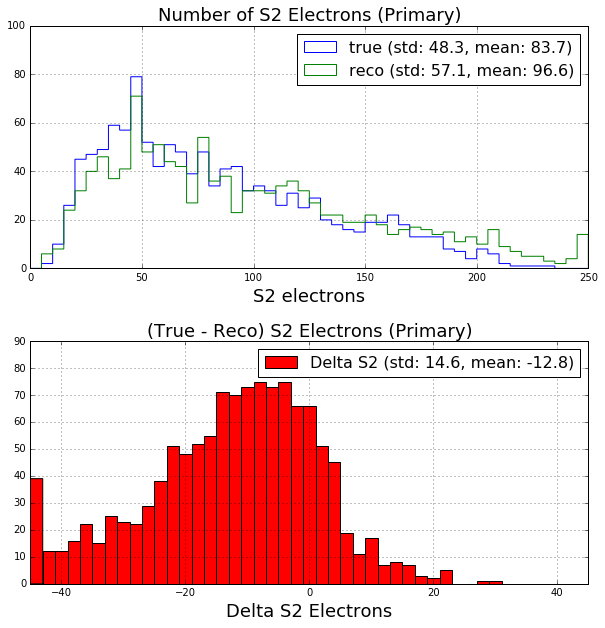

In [6]:

#------------------------------------------------------------------------------
#------------------------------------------------------------------------------

rows = 2
cols = 1

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(10, 10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.15, hspace=0.3)


#------------------------------------------------------------------------------
#------------------------------------------------------------------------------

plt.subplot(rows, cols, 1)
plt.hist(arr_s2_true_ovflw, bins=s2_nbins, range=[0, s2_max], label=s2_label_true, fill=False, histtype='step')
plt.hist(arr_s2_reco_ovflw, bins=s2_nbins, range=[0, s2_max], label=s2_label_reco, fill=False, histtype='step')
plt.ylim([0, 100])
plt.title('Number of S2 Electrons (Primary)', fontsize=18)
plt.xlabel('S2 electrons', fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)


#------------------------------------------------------------------------------
#------------------------------------------------------------------------------

plt.subplot(rows, cols, 2)
plt.hist(arr_s2_delta_ovflw, bins=s2_delta_nbins, range=[-s2_delta_max, s2_delta_max], label=s2_label_delta, color='r')
plt.xlim([-s2_delta_max, s2_delta_max])
plt.ylim([0, 90])
plt.xlabel('', fontsize=18)
plt.title('(True - Reco) S2 Electrons (Primary)', fontsize=18)
plt.xlabel('Delta S2 Electrons', fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)


#------------------------------------------------------------------------------
#------------------------------------------------------------------------------

plt.close()
print()
display(fig)
print()



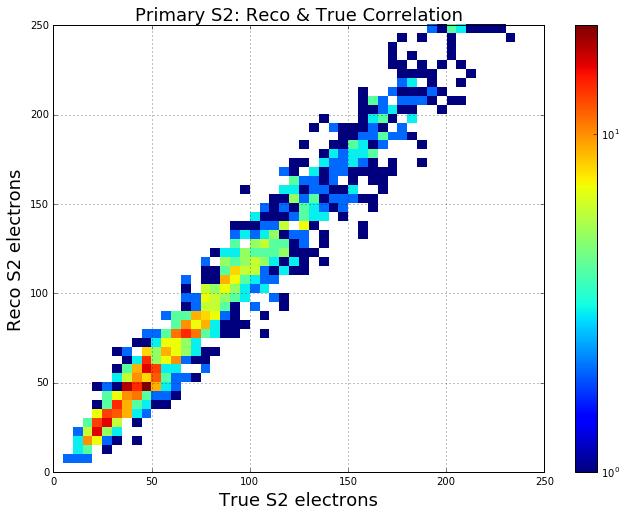

In [10]:

#------------------------------------------------------------------------------
#------------------------------------------------------------------------------

fig = plt.figure(figsize=(11,8))
plt.hist2d(arr_s2_true_ovflw, arr_s2_reco_ovflw, bins=s2_nbins, range=([0, s2_max], [0, s2_max]), norm=LogNorm())
plt.title('Primary S2: Reco & True Correlation', fontsize=18)
plt.xlabel('True S2 electrons', fontsize=18)
plt.ylabel('Reco S2 electrons', fontsize=18)
plt.colorbar()
plt.grid(True)
plt.close()


#------------------------------------------------------------------------------
#------------------------------------------------------------------------------

print()
display(fig)
print()

